<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/Project_3(Employee_Attrition_ML_Model)Git/ML_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline

#### Preprocess pipeline

In [ ]:
# Importing packages for data loading

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Raw GitHub cleaaned dataset(CSV) link
url = "https://raw.githubusercontent.com/Infant-Joshva/Data-Science-learning-path/refs/heads/main/Project_3(Employee_Attrition_ML_Model)Git/data%20set/cleaned_employee_data.csv"

emp_df = pd.read_csv(url).reset_index(drop=True)
emp_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Emp_ID,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Importing lib for Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Manually doing label encoding for Attrition

emp_df['Attrition_binary'] = emp_df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Creating Features and Target in new DataFrame

X=emp_df[['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
         'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel',
         'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']] # Features
Y=emp_df['Attrition_binary'] # Target

In [ ]:
# Seperating Numerical and Categorical Features
# For 1st we seperating Numerical into 2 types one is Continues and Discreat

num_feature=X[X.select_dtypes(include=['int64','float64','int32']).columns]
num_feature

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,3,2,4,5993,8,11,3,1,8,0,1,6,4,0,5
1,49,8,1,3,2,2,2,5130,1,23,4,4,10,3,3,10,7,1,7
2,37,2,2,4,2,1,3,2090,6,15,3,2,7,3,3,0,0,0,0
3,33,3,4,4,3,1,3,2909,1,11,3,3,8,3,3,8,7,3,0
4,27,2,1,1,3,1,2,3468,9,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2,4,2571,4,17,3,3,17,3,3,5,2,0,3
1466,39,6,1,4,2,3,1,9991,4,15,3,1,9,5,3,7,7,1,7
1467,27,4,3,2,4,2,2,6142,1,20,4,2,6,0,3,6,2,0,3
1468,49,2,3,4,2,2,2,5390,2,14,3,4,17,3,2,9,6,0,8


In [ ]:
# We have continues and discret values so we again seperating numerical values
num_feature_dis = num_feature[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                               'RelationshipSatisfaction','WorkLifeBalance','PerformanceRating']].reset_index(drop=True) # Discreat Values
                               #Need to confirm "StockOptionLevel" is needed or not
num_features_con = num_feature[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].reset_index(drop=True) # Continues Values

In [ ]:
# Seperating Categorical features

cat_feature=X[X.select_dtypes(include=['object']).columns].reset_index(drop=True)
cat_feature

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [ ]:
# Seperating Categorical features for OneHot Encoding

cat_feature_OH = cat_feature[['BusinessTravel','Department','Gender','MaritalStatus','OverTime']].reset_index(drop=True)
cat_feature_OH

,BusinessTravel,Department,Gender,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Female,Single,Yes
1,Travel_Frequently,Research & Development,Male,Married,No
2,Travel_Rarely,Research & Development,Male,Single,Yes
3,Travel_Frequently,Research & Development,Female,Married,Yes
4,Travel_Rarely,Research & Development,Male,Married,No
...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Male,Married,No
1466,Travel_Rarely,Research & Development,Male,Married,No
1467,Travel_Rarely,Research & Development,Male,Married,Yes
1468,Travel_Frequently,Sales,Male,Married,No


In [ ]:
# Seperating Categorical features for Target Encoding

cat_feature_TR = cat_feature[['EducationField','JobRole']].reset_index(drop=True)
cat_feature_TR

,EducationField,JobRole
0,Life Sciences,Sales Executive
1,Life Sciences,Research Scientist
2,Other,Laboratory Technician
3,Life Sciences,Research Scientist
4,Medical,Laboratory Technician
...,...,...
1465,Medical,Laboratory Technician
1466,Medical,Healthcare Representative
1467,Life Sciences,Manufacturing Director
1468,Medical,Sales Executive


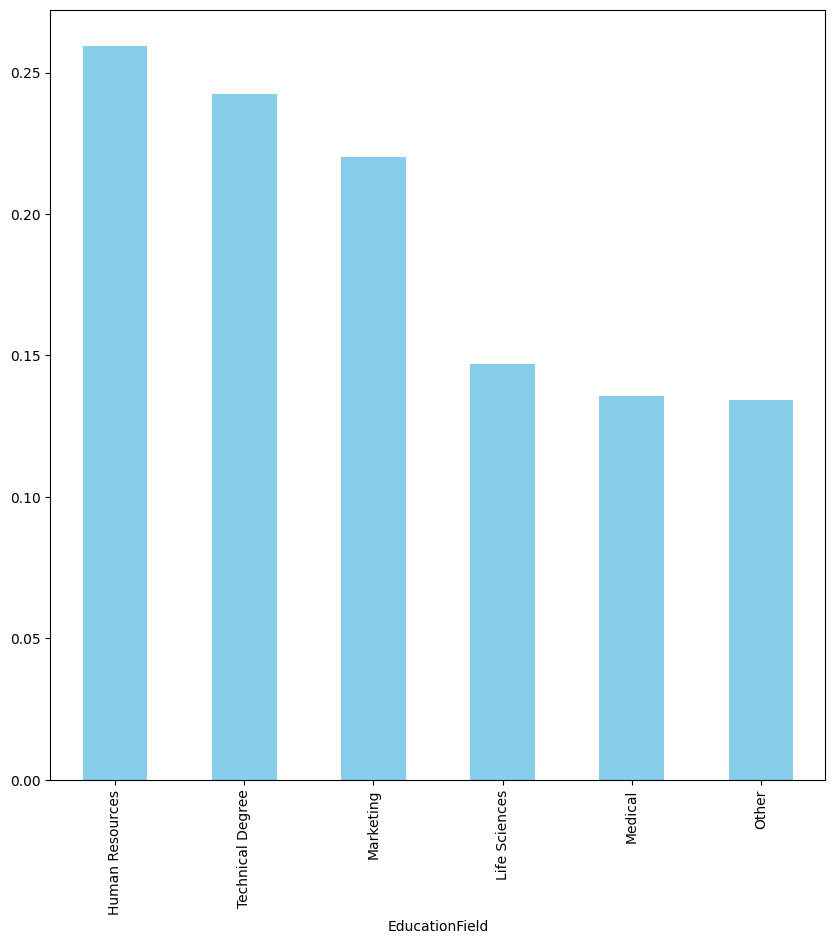

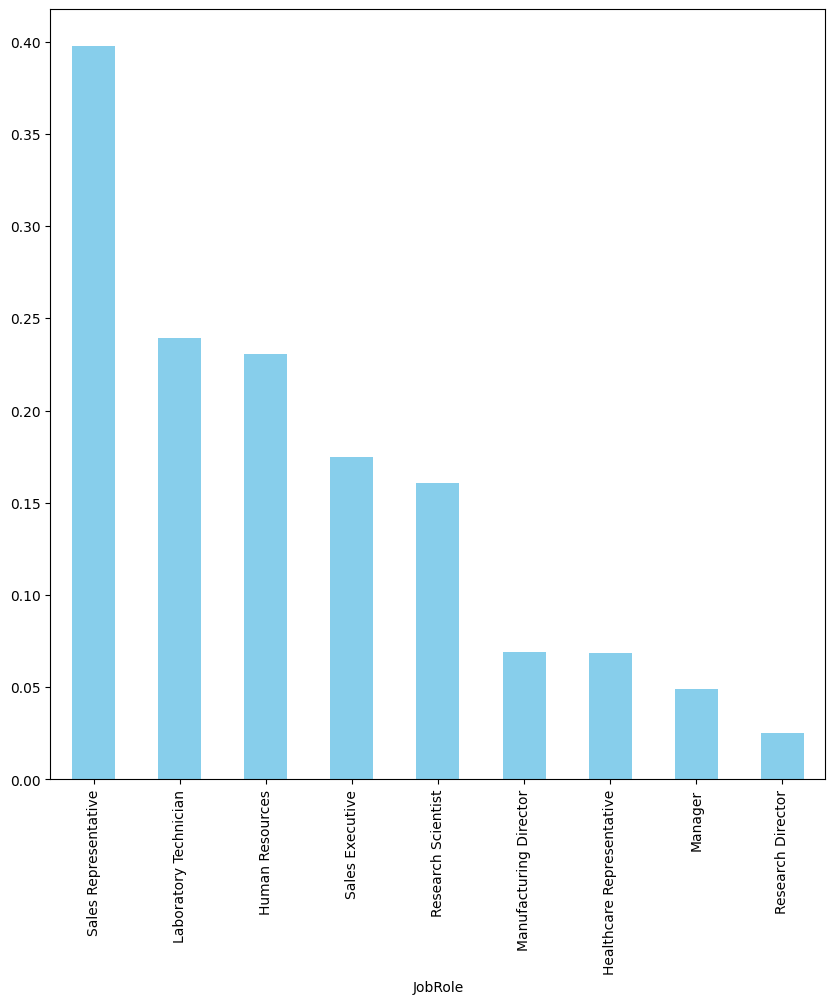

In [ ]:
# We need a column category for Target based Ordinal Encoding

# Encode Attrition to binary

# emp_df['Attrition_binary'] = emp_df['Attrition'].map({'Yes': 1, 'No': 0})
cat_feature_TR_list = []
for i in cat_feature_TR:
  plt.figure(figsize=(10,10))
  (emp_df.groupby(i)['Attrition_binary'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue'))
  cat_feature_TR_list.append(list(emp_df.groupby(i)['Attrition_binary'].mean().sort_values(ascending=False).index))

In [ ]:
# The list for Odinal Encoding Categorical value

cat_feature_TR_list

[['Human Resources',
  'Technical Degree',
  'Marketing',
  'Life Sciences',
  'Medical',
  'Other'],
 ['Sales Representative',
  'Laboratory Technician',
  'Human Resources',
  'Sales Executive',
  'Research Scientist',
  'Manufacturing Director',
  'Healthcare Representative',
  'Manager',
  'Research Director']]

In [ ]:
# Creating transformer for Numerical con columns

numerical_transformer_con=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

numerical_transformer_con

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:
# Creating transformer for dis column

numerical_transformer_dis=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'))
])

numerical_transformer_dis

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

In [ ]:
# Creating transformer for cat ordinal column

categorical_transformer_OH=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(dtype='int64', sparse_output=False, drop='first'))
])

categorical_transformer_OH

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='first', dtype='int64',
                               sparse_output=False))])

In [ ]:
# Creating transformer for cat Target column

categorical_transformer_TR=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=cat_feature_TR_list))
])

categorical_transformer_TR

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OrdinalEncoder(categories=[['Human Resources',
                                             'Technical Degree', 'Marketing',
                                             'Life Sciences', 'Medical',
                                             'Other'],
                                            ['Sales Representative',
                                             'Laboratory Technician',
                                             'Human Resources',
                                             'Sales Executive',
                                             'Research Scientist',
                                             'Manufacturing Director',
                                             'Healthcare Representative',
                                             'Manager',
                                             'Research Director']]))])

In [ ]:
# Combining the all transformer as a full loaded pipeline with column transformer

preprocess=ColumnTransformer(
    transformers=[
        ('num_con',numerical_transformer_con,num_features_con.columns),
        ('num_dis',numerical_transformer_dis,num_feature_dis.columns),
        ('cat_OH',categorical_transformer_OH,cat_feature_OH.columns),
        ('cat_TR',categorical_transformer_TR,cat_feature_TR.columns)
    ]
)
preprocess

ColumnTransformer(transformers=[('num_con',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManag...
                                                  OrdinalEncoder(categories=[['Human '
                                                                              'Resources',
                                                                              'Technical '
                                                                              'Degree',
                                                                              'Marketing',
                                                                              'Life '
                                                                              'Sciences',
                                                                              'Medical',
                                                                              'Other'],
                                                                             ['Sales '
                                                                              'Representative',
                                                                              'Laboratory '
                                                                              'Technician',
                                                                              'Human '
                                                                              'Resources',
                                                                              'Sales '
                                                                              'Executive',
                                                                              'Research '
                                                                              'Scientist',
                                                                              'Manufacturing '
                                                                              'Director',
                                                                              'Healthcare '
                                                                              'Representative',
                                                                              'Manager',
                                                                              'Research '
                                                                              'Director']]))]),
                                 Index(['EducationField', 'JobRole'], dtype='object'))])

* Preprocessing pipeline ready
* Here I'm going to create ML Pipeline

#### ML Pipeline

In [ ]:
# Importing packages for ML
# Doing LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Splitting data for train and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1176, 26), (294, 26), (1176,), (294,))

In [ ]:
# Creating pipeline for LogReg

logreg_pipeline=Pipeline(steps=[
    ('preprocess',preprocess),
    ('logreg',LogisticRegression())
])

logreg_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_con',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLast...
                                                                                               'Technical '
                                                                                               'Degree',
                                                                                               'Marketing',
                                                                                               'Life '
                                                                                               'Sciences',
                                                                                               'Medical',
                                                                                               'Other'],
                                                                                              ['Sales '
                                                                                               'Representative',
                                                                                               'Laboratory '
                                                                                               'Technician',
                                                                                               'Human '
                                                                                               'Resources',
                                                                                               'Sales '
                                                                                               'Executive',
                                                                                               'Research '
                                                                                               'Scientist',
                                                                                               'Manufacturing '
                                                                                               'Director',
                                                                                               'Healthcare '
                                                                                               'Representative',
                                                                                               'Manager',
                                                                                               'Research '
                                                                                               'Director']]))]),
                                                  Index(['EducationField', 'JobRole'], dtype='object'))])),
                ('logreg', LogisticRegression())])

In [ ]:
logreg_pipeline.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_con',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLast...
                                                                                               'Technical '
                                                                                               'Degree',
                                                                                               'Marketing',
                                                                                               'Life '
                                                                                               'Sciences',
                                                                                               'Medical',
                                                                                               'Other'],
                                                                                              ['Sales '
                                                                                               'Representative',
                                                                                               'Laboratory '
                                                                                               'Technician',
                                                                                               'Human '
                                                                                               'Resources',
                                                                                               'Sales '
                                                                                               'Executive',
                                                                                               'Research '
                                                                                               'Scientist',
                                                                                               'Manufacturing '
                                                                                               'Director',
                                                                                               'Healthcare '
                                                                                               'Representative',
                                                                                               'Manager',
                                                                                               'Research '
                                                                                               'Director']]))]),
                                                  Index(['EducationField', 'JobRole'], dtype='object'))])),
                ('logreg', LogisticRegression())])

In [ ]:
Y_train.head(10)

,Attrition_binary
1097,0
727,0
254,0
1175,0
1341,0
1347,0
983,0
759,0
86,0
1394,0


In [ ]:
Y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test

,Attrition_binary
1041,0
184,0
1222,1
67,0
220,0
...,...
567,0
560,0
945,0
522,0


In [ ]:
Y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Y_train_pred=logreg_pipeline.predict(X_train)
Y_test_pred=logreg_pipeline.predict(X_test)

print('Confusion Matrix Train')
print('--'*50)
print(confusion_matrix(Y_train,Y_train_pred))
print('Confusion Matrix Test')
print('--'*50)
print(confusion_matrix(Y_test,Y_test_pred))
print('**'*50)
print('Classification Report Train')
print('--'*50)
print(classification_report(Y_train,Y_train_pred))
print('Classification Report Test')
print('--'*50)
print(classification_report(Y_test,Y_test_pred))
print('--'*50)


Confusion Matrix Train
----------------------------------------------------------------------------------------------------
[[953  25]
 [103  95]]
Confusion Matrix Test
----------------------------------------------------------------------------------------------------
[[247   8]
 [ 25  14]]
****************************************************************************************************
Classification Report Train
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       978
           1       0.79      0.48      0.60       198

    accuracy                           0.89      1176
   macro avg       0.85      0.73      0.77      1176
weighted avg       0.88      0.89      0.88      1176

Classification Report Test
----------------------------------------------------------------------------------------------------
              precisio

In [ ]:
emp_df['Attrition_binary'].value_counts()

,count
Attrition_binary,
0,1233
1,237


In [ ]:
# Adjusting threshold

# ✅ Fit pipeline
logreg_pipeline.fit(X_train, Y_train)

# ✅ Predict probabilities
Y_train_probs = logreg_pipeline.predict_proba(X_train)[:, 1]
Y_test_probs  = logreg_pipeline.predict_proba(X_test)[:, 1]

# ✅ Apply custom threshold
threshold = 0.8   # change this value to tune
Y_train_pred = (Y_train_probs >= threshold).astype(int)
Y_test_pred  = (Y_test_probs  >= threshold).astype(int)

# ✅ Evaluate
print("Classification Report - Train")
print(classification_report(Y_train, Y_train_pred))

print("Classification Report - Test")
print(classification_report(Y_test, Y_test_pred))


Classification Report - Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       978
           1       1.00      0.15      0.26       198

    accuracy                           0.86      1176
   macro avg       0.93      0.58      0.59      1176
weighted avg       0.88      0.86      0.81      1176

Classification Report - Test
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
